# ***Project Algerian Forest Analysis***

In [1]:
#Importing Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Reading Dataset using Pandas 
dataset=pd.read_csv(r"D:\Downloaded files\Algerian_forest_fires_dataset_UPDATE.csv",header=1) #reading dataset using path 

In [3]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [4]:
dataset.head() #By observing this data i am targeting Temperature and classes.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
dataset.info() #observing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# ***Data Cleaning***

In [6]:
dataset[dataset.isnull().any(axis=1)] #checking any null values is present

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df=dataset.loc[:122,"Region"]=0   #converting new separate column for region 
df=dataset.loc[122:,"Region"]=1

In [8]:
dataset[["Region"]]=dataset[["Region"]].astype(int)     ##converting Region values as int

In [9]:
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [10]:
dataset=dataset.dropna().reset_index(drop=True)    #dropping nan values

In [11]:
dataset=dataset.drop(122).reset_index(drop=True)

In [12]:
dataset.iloc[[122]]  #checking unwanted  present in a index 122 is removed or not
df=dataset

In [13]:
df.columns =df.columns.str.strip() #stripping spaces from columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int) #Coverting a  numerical data to int 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [18]:
object_data=[fea for fea in df.columns if df[fea].dtypes=="O"] #separating Categorical data points

In [19]:
for i in object_data:     #Converting Continuous variable into Float and separate Categorical variable classes as object.
    if i!="Classes":
        df[i]=df[i].astype(float)
        
        

In [20]:
df.info()  #Data is well maintain for further observation ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


# ***EDA and Statical Analysis***

In [21]:
#first making a copy of Dataset
df_copy=df.copy()


In [22]:
categ_Data=[fea for fea in df_copy.columns if df_copy[fea].dtypes=="O"]   #Separating Categorical and Numerical Data
numer_Data=[fea for fea in df_copy.columns if df_copy[fea].dtypes!="O"]

In [23]:
df_copy[numer_Data].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [24]:
df_copy["Classes"].value_counts()   #i think that somes mismatch data are there two values in data fire and non-fire but show separately because of spaces or something else.

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [25]:
#Encoding of the Categorical Feature Classes Fire as 1 and non fire as 0
df_copy["Classes"]=np.where(df_copy["Classes"].str.contains("not fire"),0,1)


In [26]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [27]:
df_copy["Classes"].value_counts() #Problem is solved now  fire as 1 and non-fire as 0 ...

Classes
1    137
0    106
Name: count, dtype: int64

In [28]:
df_copy.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


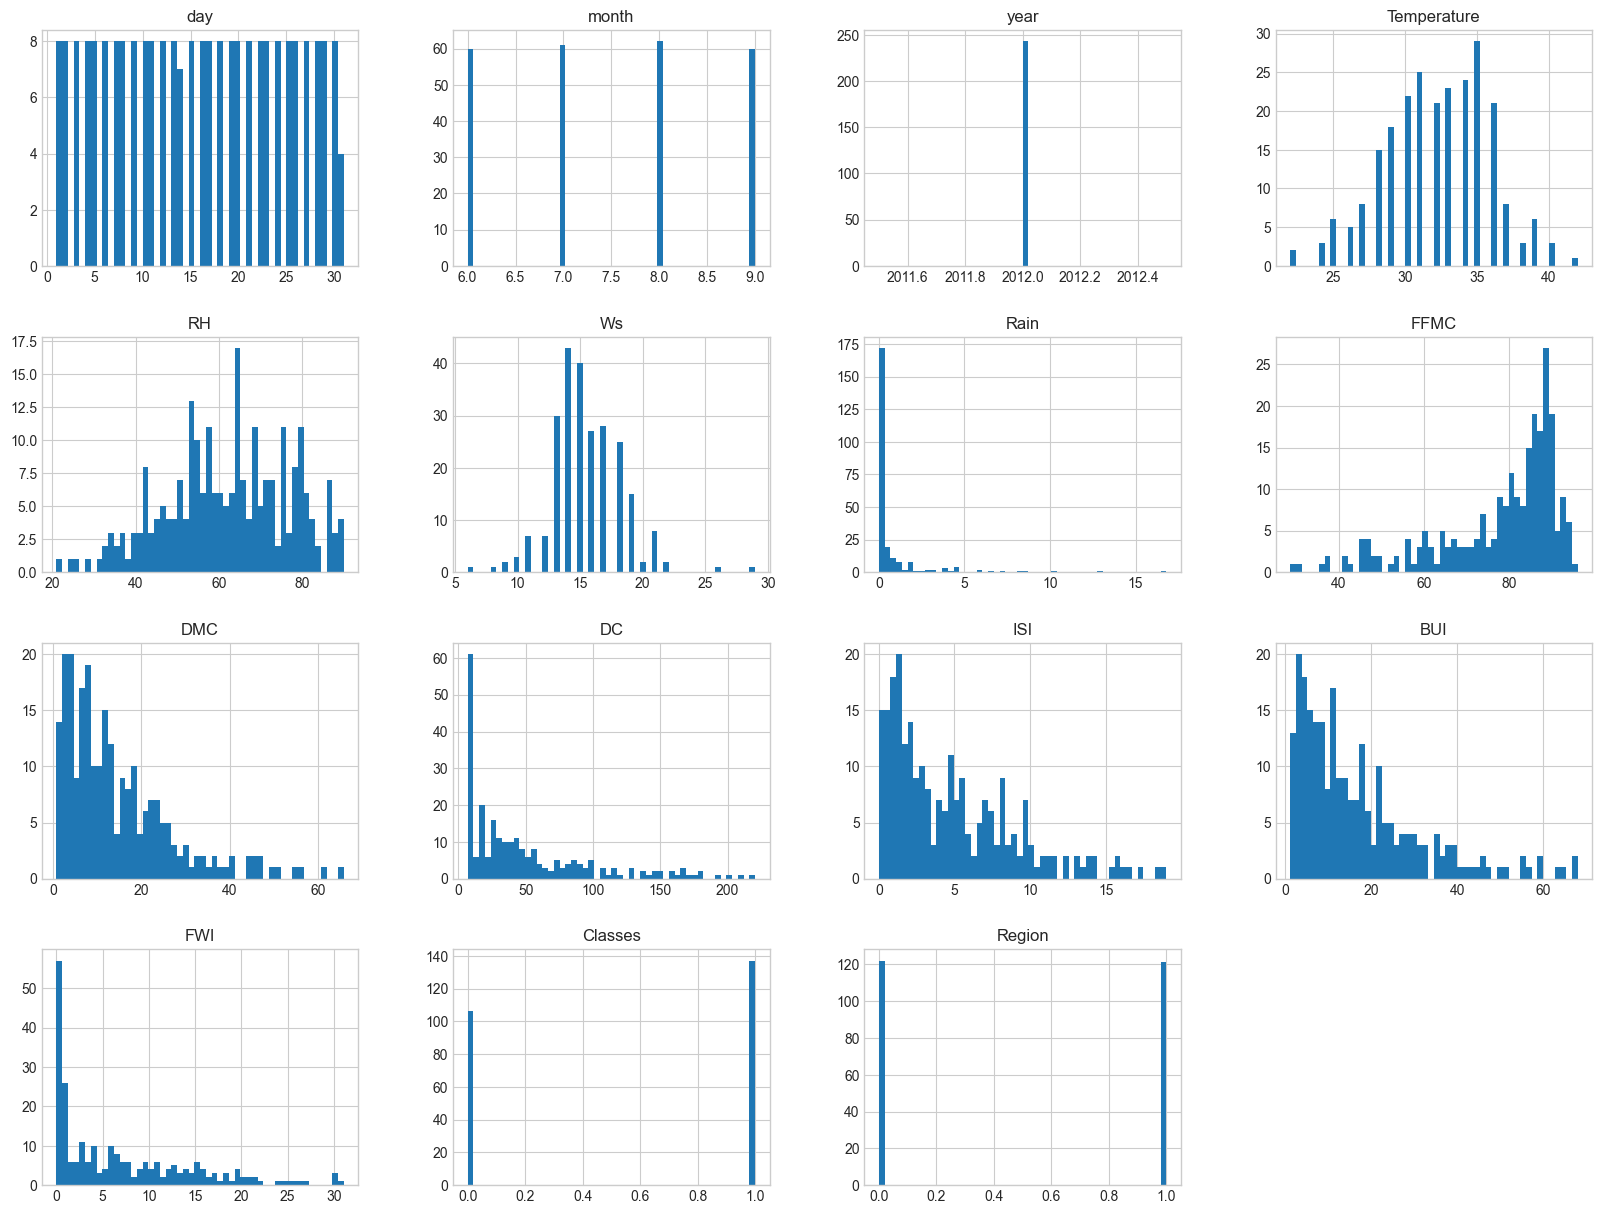

In [29]:
#Ploting Density for all features
from matplotlib import style
plt.style.use("seaborn-v0_8-whitegrid")
df_copy.hist(bins=50 , figsize=(20,15))
plt.show()

In [30]:
#Percentage Piechart for classes
class_percentage=df_copy["Classes"].value_counts(normalize=True)*100

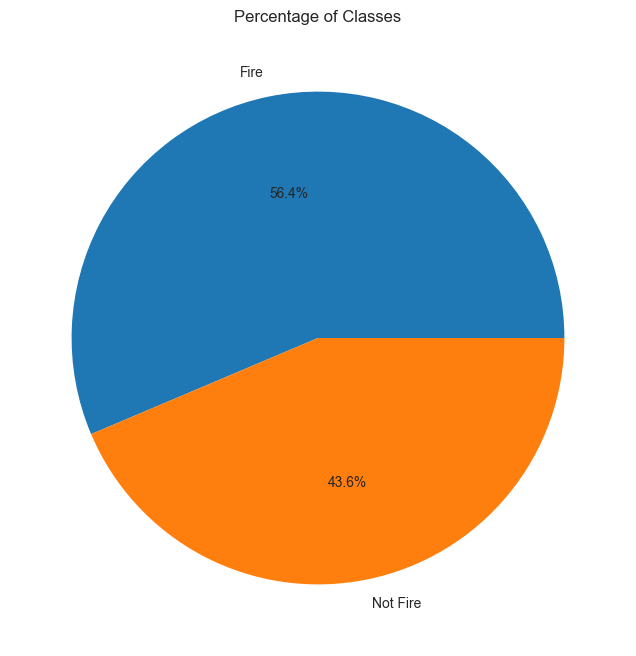

In [31]:
#plotting Piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(10,8))
plt.pie(class_percentage,labels=classlabels , autopct="%1.1f%%")
plt.title("Percentage of Classes")
plt.show()

In [32]:
df_copy.drop(["day","month","year"],axis=1,inplace=True)  #Dropping day ,month ,year  

In [33]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),"no fire","fire")

In [34]:
df["Classes"].value_counts()

Classes
fire       137
no fire    106
Name: count, dtype: int64

In [35]:
df_copy.corr() #Correlation Between Each and Every Values

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


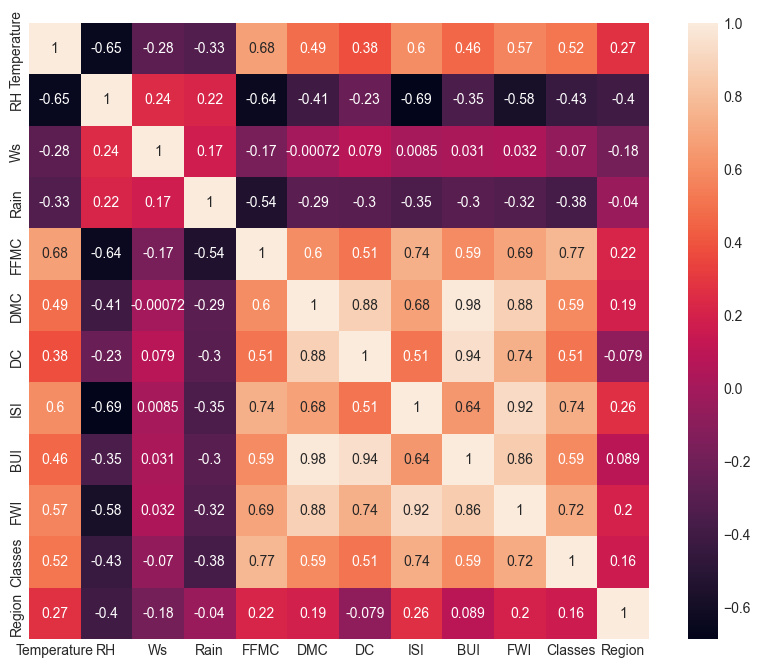

In [36]:
plt.figure(figsize=(10,8))   # lighter side  show higher correlation between each and every values
sns.heatmap(df_copy.corr(),annot=True)
plt.show()

<Axes: xlabel='FWI'>

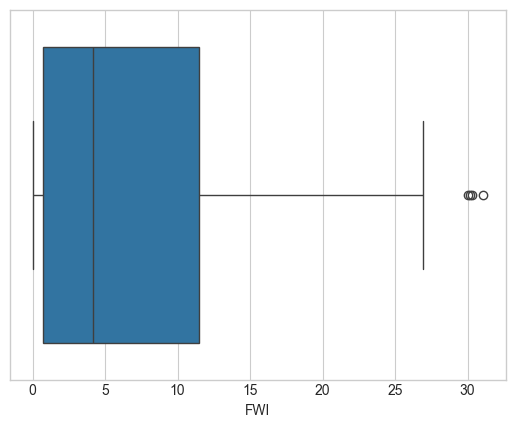

In [37]:
#observing Outliers using box plot
sns.boxplot(x=df_copy["FWI"])    #little bit Outliers not that much 

Text(0.5, 1.0, 'sidi -Bel Region')

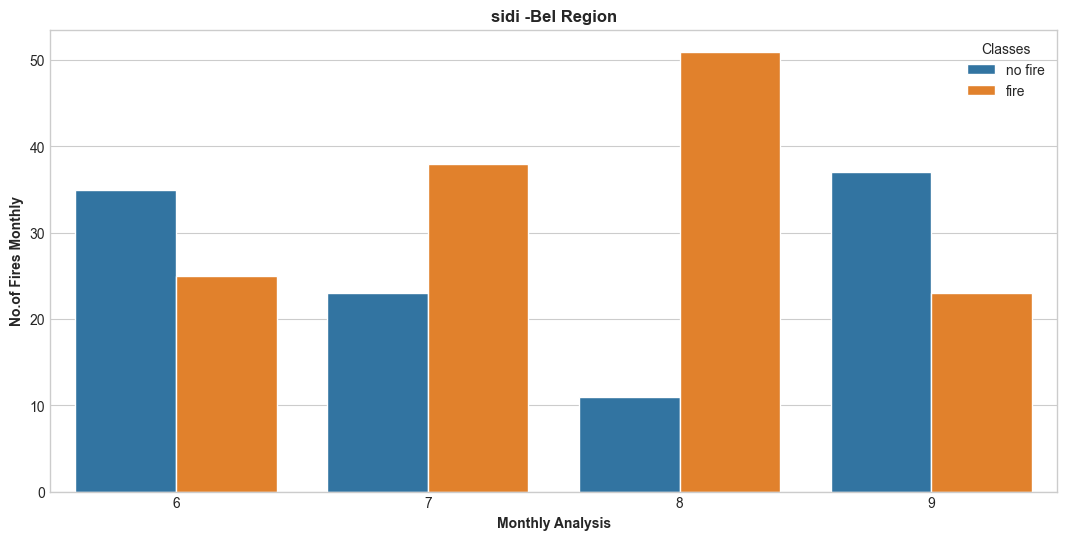

In [38]:
#Monthly Fire Analysis
df_temp=df.loc[df["Region"]==1]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df)
plt.xlabel("Monthly Analysis",weight="bold")
plt.ylabel("No.of Fires Monthly",weight="bold")
plt.title("sidi -Bel Region",weight="bold")

Text(0.5, 1.0, 'Brjaia Region')

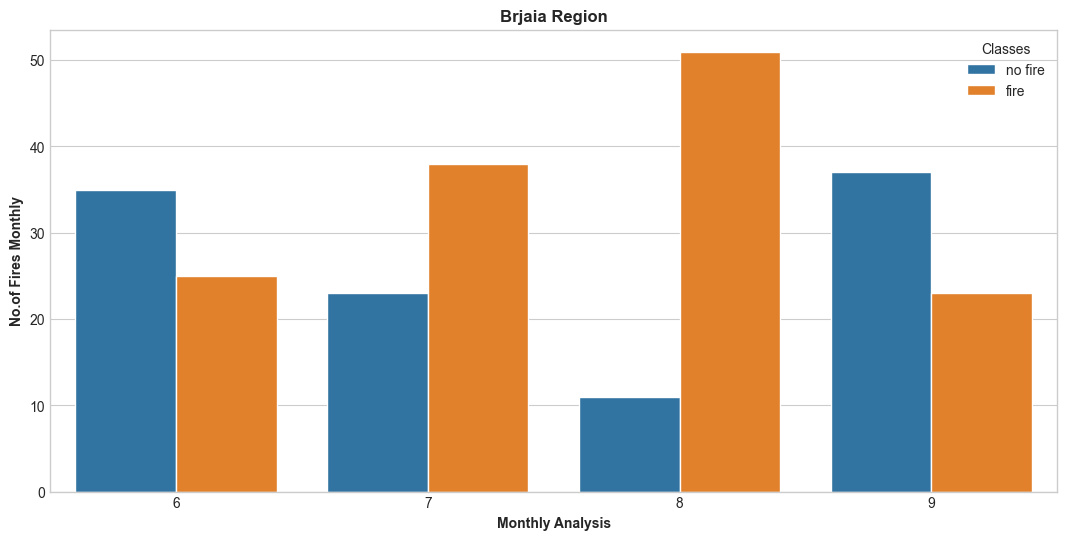

In [39]:
#Monthly Fire Analysis
df_temp=df.loc[df["Region"]==0]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df)
plt.xlabel("Monthly Analysis",weight="bold")
plt.ylabel("No.of Fires Monthly",weight="bold")
plt.title("Brjaia Region",weight="bold")

***Observation:-***
1.By Observing a Data of Both the Region ,Most of the fire Occur in between month of August and September .

2.Very higher no. of Fire Occur in the month of June , July and August .

3.In september very Less no.of Fire cases are seen in Both the Region 

In [40]:
df_model=df.drop(["day","month","year"] , axis=1)

In [41]:
df_model["Classes"]=np.where(df_model["Classes"].str.contains("no fire"),0,1)

In [42]:
df_model["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [43]:
x=df_model.drop("FWI", axis=1)
y=df_model["FWI"]

# Model Training

In [44]:
#Train Model using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.25 ,random_state=42)

In [45]:
x_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0


In [46]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [47]:
y_train.shape,y_test.shape

((182,), (61,))

In [48]:
#Feature Selection basedon Correlation 
x_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

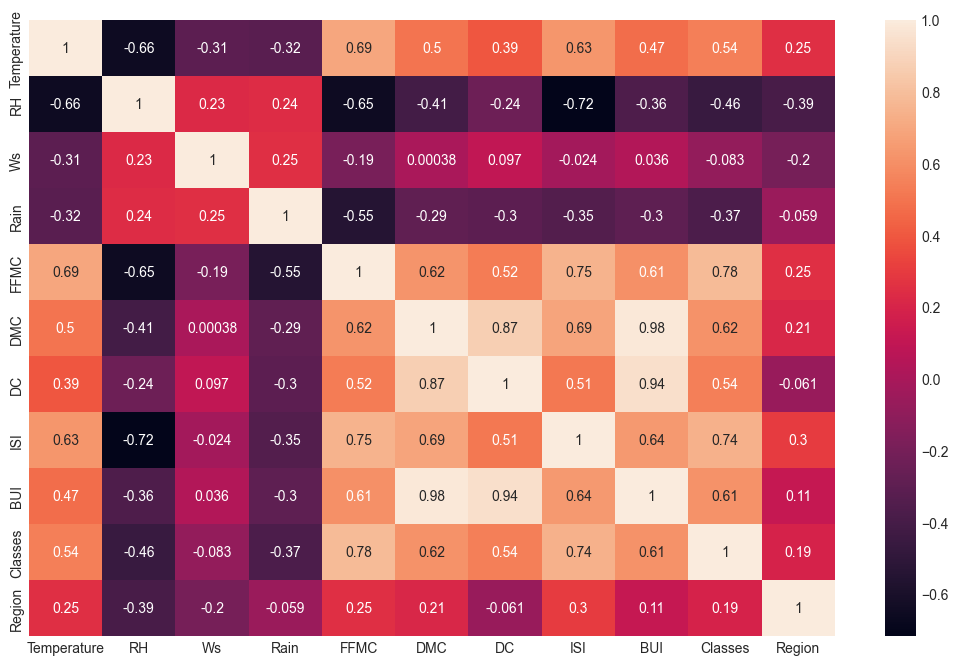

In [49]:
#Checking Multivariate Correlation 
plt.figure(figsize=(13,8))
sns.heatmap(x_train.corr(),annot=True)

In [50]:
def correlation(dataset, threshhold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshhold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    
    return col_corr

In [51]:

#Threshold--Domain Expert
corr_fea=correlation(x_train,0.85) 

In [52]:
#Dropping Correlation Feature greater than 0.85
x_train.drop(corr_fea,axis=1,inplace=True)
x_test.drop(corr_fea,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

# ***Feature Scaling or Standardization***

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)    #Why we have used transform instead of fit.transform beacause we have to use average and stantard deviation of training data...we are using training mew and sigma

In [54]:
x_train_scale

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

# ***Box plot to understand effect of Standard Scaler***


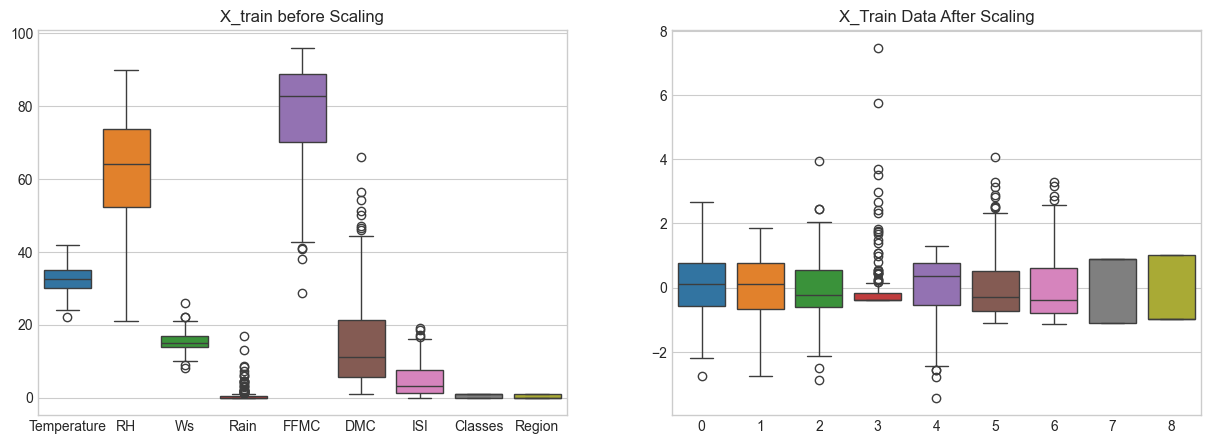

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("X_train before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scale)
plt.title("X_Train Data After Scaling")
plt.show()

# **linear Regression Model**

Mean Absolute Error = 0.5468236465249976
r2_Square = 0.9847657384266951


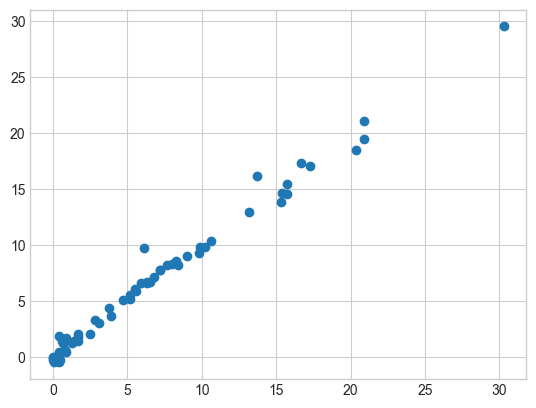

In [56]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error , r2_score,mean_squared_error
linear=LinearRegression()
lin_reg=linear.fit(x_train_scale,y_train)
y_predict=lin_reg.predict(x_test_scale)
MAE=mean_absolute_error(y_test,y_predict)
r2_Square=r2_score(y_test,y_predict)
print("Mean Absolute Error =",MAE)
print("r2_Square =",r2_Square) 
plt.scatter(y_test,y_predict)    #Model is Linear that means Our Model is good till now

 lasso Mean Absolute Error = 1.1331759949144085
 lasso r2_Square = 0.9492020263112388


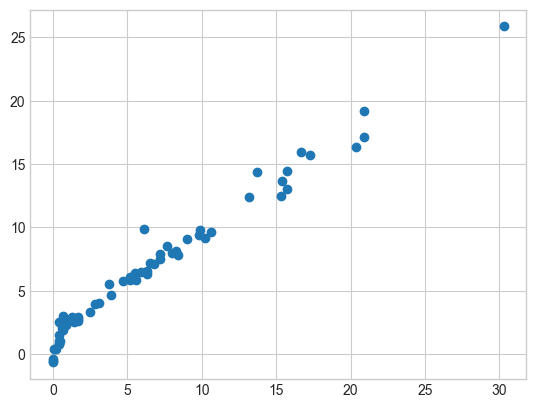

In [57]:
lasso=Lasso()      #Lasso_Model
lasso.fit(x_train_scale,y_train)
y_predict_lasso=lasso.predict(x_test_scale)
MAE_lasso=mean_absolute_error(y_test,y_predict_lasso)
r2_Square_lasso=r2_score(y_test,y_predict_lasso)
print(" lasso Mean Absolute Error =",MAE_lasso)
print(" lasso r2_Square =",r2_Square_lasso) 
plt.scatter(y_test,y_predict_lasso)    #Model is Linear that means Our Model is good till now

Mean Absolute Error_Ridge = 0.5642305340105693
r2_Square_Ridge= 0.9842993364555513


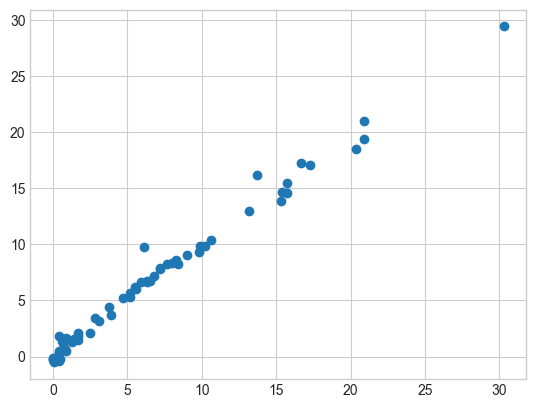

In [58]:
ridge=Ridge()  #Ridge Model
ridge.fit(x_train_scale,y_train)
y_predic_Ridge=ridge.predict(x_test_scale)
MAE_Ridge=mean_absolute_error(y_test,y_predic_Ridge)
r2_Square_Ridge=r2_score(y_test,y_predic_Ridge)
print("Mean Absolute Error_Ridge =",MAE_Ridge)
print("r2_Square_Ridge=",r2_Square_Ridge) 
plt.scatter(y_test,y_predic_Ridge)    #Model is Linear that means Our Model is good till now



Mean Absolute Error_Elastic = 1.8822353634896
r2_Square_Elastic= 0.9842993364555513


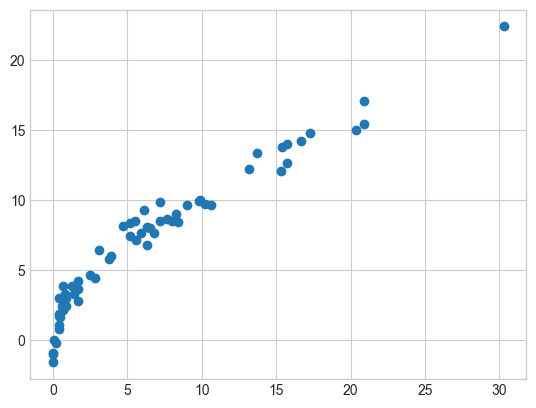

In [59]:
#ElasticNet Regression 
Elasticnet=ElasticNet()  #ElasticNet Model
Elasticnet.fit(x_train_scale,y_train)
y_predic_Elastic=Elasticnet.predict(x_test_scale)
MAE_Elastic=mean_absolute_error(y_test,y_predic_Elastic)
r2_Square_Elastic=r2_score(y_test,y_predic_Elastic)
print("Mean Absolute Error_Elastic =",MAE_Elastic)
print("r2_Square_Elastic=",r2_Square_Ridge) 
plt.scatter(y_test,y_predic_Elastic)   



# ***Lasso Cross-Validation***

In [ ]:
from sklearn.linear_model import LassoCV